# **Movie Genre**

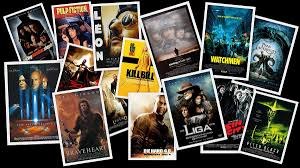

Import all the necessary libraries

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load train and test data

In [ ]:
df_train=pd.read_excel("/content/drive/MyDrive/movie genre/movie_genre/movie_genre_train.xlsx")
df_test=pd.read_excel("/content/drive/MyDrive/movie genre/movie_genre/movie_genre_test.xlsx")

Detailed view of train and test data

In [ ]:
df_train.head()

,No,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:

df_test.head()

,No,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
df=pd.concat([df_train,df_test],ignore_index=True)
df

,No,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
13440,14710,Who Is Simon Miller? (2011),family,"Like most families, the Millers have their ch..."
13441,14711,Romance Rides the Range (1936),western,"Baritone singer Barry Glendon, completing a s..."
13442,14712,GasHole (2010),documentary,GasHole is a new documentary film about the h...
13443,14713,Ishq Holiday (2011),romance,Travel to sunny beautiful Mauritius as a girl...


In [ ]:
df.drop(["No","Title"],axis=1,inplace=True)


In [ ]:
df

,Genre,Description
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The film's title refers not only to the un-re...
...,...,...
13440,family,"Like most families, the Millers have their ch..."
13441,western,"Baritone singer Barry Glendon, completing a s..."
13442,documentary,GasHole is a new documentary film about the h...
13443,romance,Travel to sunny beautiful Mauritius as a girl...


In [ ]:
df.isnull().sum()

,0
Genre,0
Description,0


In [ ]:
df["Genre"].value_counts()

,count
Genre,
drama,3415
documentary,3289
comedy,1803
short,1294
horror,524
thriller,376
action,331
western,224
reality-tv,213


In [ ]:

encoder=LabelEncoder()
df["Genre"]=encoder.fit_transform(df["Genre"])

In [ ]:
df

,Genre,Description
0,8,Listening in to a conversation between his do...
1,24,A brother and sister with a past incestuous r...
2,1,As the bus empties the students for their fie...
3,8,To help their unemployed father make ends mee...
4,8,The film's title refers not only to the un-re...
...,...,...
13440,9,"Like most families, the Millers have their ch..."
13441,26,"Baritone singer Barry Glendon, completing a s..."
13442,7,GasHole is a new documentary film about the h...
13443,19,Travel to sunny beautiful Mauritius as a girl...


In [ ]:
text=df.Description
text

,Description
0,Listening in to a conversation between his do...
1,A brother and sister with a past incestuous r...
2,As the bus empties the students for their fie...
3,To help their unemployed father make ends mee...
4,The film's title refers not only to the un-re...
...,...
13440,"Like most families, the Millers have their ch..."
13441,"Baritone singer Barry Glendon, completing a s..."
13442,GasHole is a new documentary film about the h...
13443,Travel to sunny beautiful Mauritius as a girl...


In [ ]:

text=text.str.replace('[^a-zA-Z0-9 ]'," ",regex=True)
text

,Description
0,Listening in to a conversation between his do...
1,A brother and sister with a past incestuous r...
2,As the bus empties the students for their fie...
3,To help their unemployed father make ends mee...
4,The film s title refers not only to the un re...
...,...
13440,Like most families the Millers have their ch...
13441,Baritone singer Barry Glendon completing a s...
13442,GasHole is a new documentary film about the h...
13443,Travel to sunny beautiful Mauritius as a girl...


In [ ]:

stemmer=PorterStemmer()
text=text.apply(lambda x:[stemmer.stem(token.lower()) for token in word_tokenize(x)]).apply(lambda token:" ".join(token))
text

,Description
0,listen in to a convers between hi doctor and p...
1,a brother and sister with a past incestu relat...
2,as the bu empti the student for their field tr...
3,to help their unemploy father make end meet ed...
4,the film s titl refer not onli to the un recov...
...,...
13440,like most famili the miller have their challen...
13441,bariton singer barri glendon complet a success...
13442,gashol is a new documentari film about the his...
13443,travel to sunni beauti mauritiu as a girl win ...


In [ ]:
words=stopwords.words("english")
text=text.apply(lambda x:[i for i  in word_tokenize(x) if x not in words]).apply(lambda x:" ".join(x))
text


,Description
0,listen in to a convers between hi doctor and p...
1,a brother and sister with a past incestu relat...
2,as the bu empti the student for their field tr...
3,to help their unemploy father make end meet ed...
4,the film s titl refer not onli to the un recov...
...,...
13440,like most famili the miller have their challen...
13441,bariton singer barri glendon complet a success...
13442,gashol is a new documentari film about the his...
13443,travel to sunni beauti mauritiu as a girl win ...


In [ ]:
text=text.apply(lambda x:[i for i in word_tokenize(x) if len(i)>2]).apply(lambda x:" ".join(x))
text

,Description
0,listen convers between doctor and parent year ...
1,brother and sister with past incestu relations...
2,the empti the student for their field trip the...
3,help their unemploy father make end meet edith...
4,the film titl refer not onli the recov bodi gr...
...,...
13440,like most famili the miller have their challen...
13441,bariton singer barri glendon complet success s...
13442,gashol new documentari film about the histori ...
13443,travel sunni beauti mauritiu girl win trip for...


In [ ]:

vectorizer=TfidfVectorizer()
data=vectorizer.fit_transform(text)
print(data)

  (0, 8616)	0.12652977937811113
  (0, 35091)	0.1803790290735881
  (0, 44643)	0.14663207234011796
  (0, 11270)	0.11029096435147517
  (0, 6937)	0.1965455236652985
  (0, 16183)	0.1996599192759739
  (0, 12696)	0.1891181248873379
  (0, 36193)	0.1269684754759859
  (0, 18974)	0.0697876297686965
  (0, 12194)	0.10422180234059278
  (0, 19099)	0.10571592482889045
  (0, 28321)	0.06593935696982502
  (0, 27792)	0.05689961330148883
  (0, 5072)	0.11124908700224112
  (0, 11025)	0.12652977937811113
  (0, 50007)	0.10518782706237827
  (0, 23221)	0.11395859066317378
  (0, 50251)	0.17896506152353886
  (0, 36759)	0.11304708376850826
  (0, 17332)	0.08996860262622071
  (0, 17625)	0.1538036368720453
  (0, 21989)	0.10438143178816794
  (0, 48040)	0.08344849185576703
  (0, 5876)	0.12022189916413528
  (0, 11455)	0.1347866211300474
  :	:
  (13444, 29673)	0.13501909089880965
  (13444, 7718)	0.10416171452221912
  (13444, 31937)	0.0998615269699459
  (13444, 38595)	0.12628003600859994
  (13444, 14823)	0.2622656798202374

In [ ]:
data.shape

(13445, 51169)

In [ ]:
X=data.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df["Genre"]
y

,Genre
0,8
1,24
2,1
3,8
4,8
...,...
13440,9
13441,26
13442,7
13443,19


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

Model Building

In [ ]:
lr=LogisticRegression()
nb=MultinomialNB()
rf=RandomForestClassifier(random_state=42)
model=[lr,nb,rf]
for select in model:
  print(select)
  select.fit(X_train,y_train)
  y_pred=select.predict(X_test)
  y_pred
  print(classification_report(y_test,y_pred))

  print("accuracy",accuracy_score(y_test,y_pred)*100)

LogisticRegression()
              precision    recall  f1-score   support

           0       0.67      0.02      0.04       103
           1       0.00      0.00      0.00        38
           2       1.00      0.02      0.03        66
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        14
           5       0.46      0.45      0.45       538
           6       0.00      0.00      0.00        31
           7       0.60      0.87      0.71      1008
           8       0.48      0.82      0.60      1040
           9       0.00      0.00      0.00        60
          10       0.00      0.00      0.00        25
          11       1.00      0.05      0.09        21
          12       0.00      0.00      0.00        11
          13       0.77      0.33      0.46       149
          14       0.67      0.03      0.06        67
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        26
      

Prediction using test data

In [ ]:
y_new=lr.predict(vectorizer.transform(["Ex-Formula 1 rookie of the year and Motor Racing Champion Tiago Monteiro is an Official SEAT Sport driver in the World Touring Car Championship (WTCC), an Official ORECA driver at the 24 hours of LeMans and 1000km of Algarve, the owner and team principal of GP2 Ocean Racing team, the owner of two brand new hip restaurants in his native Porto, the owner of a clothing and events company, not to mention a husband and father of two. This is the amazing story of the world's busiest athlete."]))
print(y_new)
print(encoder.inverse_transform(y_new))

[7]
[' documentary ']


In [ ]:
import pickle
pickle.dump(lr,open("movie_genre_prediction.sav","wb"))